In [1]:
from core.dao import QueryMaker
import re
import datetime

In [2]:
q = QueryMaker()

In [3]:
q.list_tables()

['gerenciador_dashboard',
 'auditoria_tabela',
 'conteudo',
 'estatistica_acesso',
 'fonte',
 'indicador',
 'indicador_resultado',
 'indicador_tema',
 'nivel_regiao',
 'parametro_sistema',
 'periodo',
 'regiao',
 'tema',
 'tipo_conteudo',
 'tipo_origem',
 'tipo_periodo',
 'tipo_situacao',
 'tipo_unidade_medida',
 'variavel',
 'variavel_indicador',
 'variavel_resultado']

In [4]:
indi = q('indicador', limit=None)

In [5]:
indi.keys()

Index(['cd_indicador', 'nm_indicador', 'dc_formula_indicador',
       'dc_conceito_indicador', 'dc_interpretacao_indicador',
       'dc_nota_tecnica', 'in_visibilidade', 'cd_tipo_situacao',
       'dt_atualizacao', 'cd_operador', 'cd_tipo_unidade_medida', 'cd_fonte',
       'nm_completo_indicador', 'dc_periodicidade_indicador',
       'dc_unidade_territorial', 'dc_serie_historica', 'dc_tag_indicador',
       'dc_observacao_indicador', 'tx_fonte_indicador',
       'in_consideracao_regiao'],
      dtype='object')

In [6]:
indi.head()

,cd_indicador,nm_indicador,dc_formula_indicador,dc_conceito_indicador,dc_interpretacao_indicador,dc_nota_tecnica,in_visibilidade,cd_tipo_situacao,dt_atualizacao,cd_operador,cd_tipo_unidade_medida,cd_fonte,nm_completo_indicador,dc_periodicidade_indicador,dc_unidade_territorial,dc_serie_historica,dc_tag_indicador,dc_observacao_indicador,tx_fonte_indicador,in_consideracao_regiao
0,13,PIB per capita,"[{""caractere"":""PIB582"",""tipo"":""variavel""},{""ca...",None,None,None,False,3,2019-01-30 15:40:38.830537,t010001,1,None,None,None,None,None,None,None,None,True
1,7,TEste de exclusão,"[{""caractere"":""FdÔC882"",""tipo"":""variavel""},{""c...",None,None,None,True,3,2019-01-25 15:38:17.590074,t010001,2,None,None,None,None,None,None,None,None,True
2,1,Porcentagem da população com deficiência menta...,"[{""caractere"":""("",""tipo"":""agregador""},{""caract...",Porcentagem da população com deficiência menta...,SALVAR IXXXXXXX,"Na contagem da população com deficiência, foi ...",True,3,2019-01-24 10:37:49.389301,t010001,1,None,None,None,None,None,None,None,None,True
3,5,TEste de exclusão,"[{""caractere"":""FdÔC882"",""tipo"":""variavel""},{""c...",None,None,None,False,3,2019-01-25 13:40:50.882457,t010001,1,None,None,None,None,None,None,None,None,True
4,6,TEste de exclusão,"[{""caractere"":""FdÔC882"",""tipo"":""variavel""},{""c...",None,None,None,False,3,2019-01-25 15:36:10.068724,t010001,1,None,None,None,None,None,None,None,None,True


In [7]:
#filtrando ativos
indi=indi[indi['cd_tipo_situacao']==1].reset_index(drop=True)

In [8]:
def padronizar_periodicidade(serie:str):
    
    if serie is None:
        return None
    
    mapper = {
        #como os dados sao anuais, mensal atual como se fosse anual
        'mensal' : 1,
        'anual' : 1,
        'bienal' : 2,
        'quinquenal' : 5,
        'decenal' : 10,
    }
    
    for key, val in mapper.items():
        if key in serie.lower():
            return val
    else:
        return None

In [9]:
indi['periodicidade_padrao'] = indi['dc_periodicidade_indicador'].apply(padronizar_periodicidade)

<AxesSubplot: >

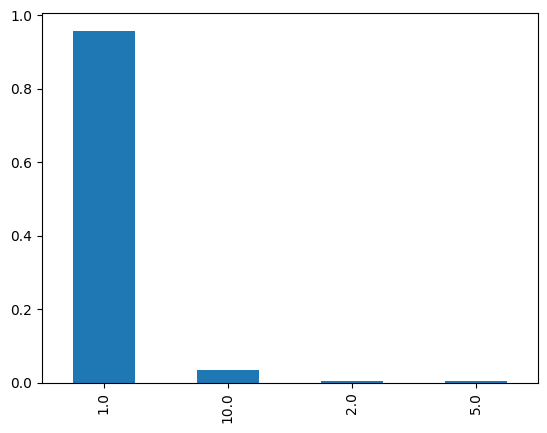

In [10]:
indi['periodicidade_padrao'].value_counts(normalize=True).plot.bar()

In [11]:
indi['periodicidade_padrao'].isnull().mean()

0.04252199413489736

In [12]:
indi[indi['periodicidade_padrao'].isnull()][['periodicidade_padrao', 'dc_periodicidade_indicador']].drop_duplicates()

,periodicidade_padrao,dc_periodicidade_indicador
55,NaN,None
67,NaN,Varia.
136,NaN,Indefinido.
599,NaN,Depende


In [13]:
indi['dc_serie_historica'].unique()

array(['Início: 2013 - Término: 2014', 'Inicio: 2006 - atualmente',
       'Início: 2016 - Atualmente.', 'início: 2008 - atualmente',
       'Início: 2018 - Atualmente', 'Início: 2013 - atualmente',
       'Início: 2006 - 2015', 'Inicio: 2014 - atualmente',
       'Início: 2010 - atualmente', '2018', 'Início; 2010 - Atualmente',
       'Início: 2012 - atualmente', 'Início: 2013 - Atualmente.',
       'Início: 2015 - Atualmente', 'Início: 2015 - Atualmente.',
       'Início: 2000/2010 - atualmente', 'Início: 2011 - atualmente',
       'Início: 2009 - atualmente', 'Início: 2006 - Atualmente',
       '2000 e 2010', 'Início: 2000 - Atualmente.',
       'Início: 2003 - Atualmente.', '2010', 'Início: 2008 - Atualmente',
       'Início: 1996 - Atualmente', 'Início: 2016 - Atualmente',
       'Início: 2005 - atualmente', 'Início: 2005 - Atualmente',
       'Início: 2012 - Atualmente', 'Início: 2011 - Atualmente',
       'Inicio: 2012 - atualmente', 'Início: 2008 - atual',
       'Início: 2015 

In [14]:
def pegar_termino(serie:str):
    
    pat = re.compile(r'\d{4}$')
    
    match = re.search(pat, serie)
    if match:
        return int(match.group())
    return None

In [15]:
def padronizar_serie_historica(serie:str):
    
    if serie is None:
        return None
    
    serie = serie.lower().replace('.', '').strip()
    if 'atual' in serie:
        return datetime.datetime.today().year
    
    termino = pegar_termino(serie)
    if termino:
        return termino
    
    return serie

In [16]:
print('\n'.join([str(item) for item in indi['dc_serie_historica'].apply(padronizar_serie_historica).unique()]))

2014.0
2023.0
2015.0
2018.0
2010.0
2017.0
nan
2020.0
2016.0
2019.0
2021.0


In [17]:
indi['final_serie_historica_padrao'] = indi['dc_serie_historica'].apply(padronizar_serie_historica)

<AxesSubplot: >

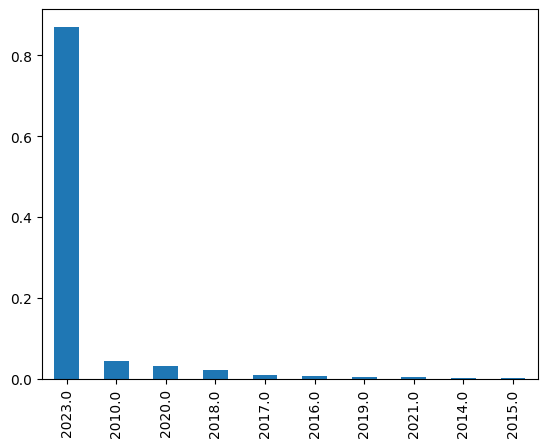

In [18]:
indi['final_serie_historica_padrao'].value_counts(normalize=True).plot.bar()

In [19]:
def ano_final(row):
    
    return row['final_serie_historica_padrao'] - row['periodicidade_padrao']

In [20]:
indi['ano_atualizacao'] = indi.apply(ano_final, axis=1)

In [21]:
indi['ano_atualizacao'].isna().mean()

0.04252199413489736

<AxesSubplot: >

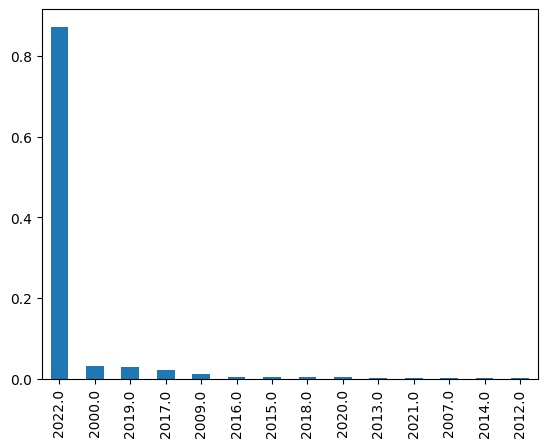

In [22]:
indi['ano_atualizacao'].value_counts(normalize=True).plot.bar()

In [23]:
results = q('indicador_resultado', limit=None)

In [24]:
results.head()

,cd_sequencia_indicador_resultado,cd_regiao,cd_periodo,cd_indicador,cd_tipo_situacao,cd_tipo_origem,vl_indicador_resultado,dt_atualizacao,cd_operador
0,172463,166,24,268,3,3,11.2701,2019-11-14 16:43:56.359080,SJ2234
1,172464,167,24,268,3,3,5.7747,2019-11-14 16:43:56.437323,SJ2234
2,172465,168,24,268,3,3,17.1576,2019-11-14 16:43:56.499687,SJ2234
3,172466,169,24,268,3,3,7.1408,2019-11-14 16:43:56.577823,SJ2234
4,172467,170,24,268,3,3,0.0000,2019-11-14 16:43:56.655951,SJ2234


In [25]:
results = results[results['cd_tipo_situacao']==1].reset_index(drop=True)

In [26]:
periodos = q('periodo', limit=None)

In [27]:
periodos.head()

,cd_periodo,vl_periodo,cd_tipo_periodo,cd_tipo_situacao,dt_atualizacao,cd_operador
0,1,1980,1,1,2018-01-01 00:00:00.000000,SJ2234
1,2,1981,1,1,2018-01-01 00:00:00.000000,SJ2234
2,3,1982,1,1,2019-04-10 15:35:55.000020,t010001
3,4,1983,1,1,2019-04-10 15:35:55.000030,t010001
4,5,1984,1,1,2019-04-10 15:35:55.000040,t010001


In [28]:
periodos.vl_periodo.max()

'2030'

In [29]:
periodos['cd_tipo_periodo'].unique()

array([1], dtype=int64)

In [30]:
periodos = periodos[periodos['cd_tipo_situacao']==1].reset_index(drop=True)

In [31]:
mapper_periodos = dict(zip(periodos['cd_periodo'].astype(int), periodos['vl_periodo'].astype(int)))

In [32]:
results['cd_periodo'].dtype

dtype('O')

In [33]:
results['ano'] = results['cd_periodo'].astype(int).apply(lambda x: mapper_periodos.get(x))

In [34]:
results['ano'].unique()

array([2009, 2010, 2016, 2015, 2018, 2017, 2008, 2011, 2012, 2006, 2013,
       2007, 2014, 2005, 2004, 2001, 2002, 2003, 2019, 2000, 2021, 2020,
       1991, 2022, 1999, 1998, 1997, 1996], dtype=int64)

In [35]:
results['ano'].isnull().mean()

0.0

In [36]:
cols_results = ['cd_indicador', 'ano']

In [37]:
results_indi = results[cols_results]

In [38]:
results_indi = results_indi.sort_values(by='ano')

In [39]:
results_indi.head()

,cd_indicador,ano
14977,399,1991
128943,19,1996
128937,19,1996
128936,19,1996
128935,19,1996


In [40]:
results_indi = results_indi.drop_duplicates(keep='first')

In [41]:
results_indi.head()

,cd_indicador,ano
14977,399,1991
128943,19,1996
97841,19,1997
100537,766,1997
100511,765,1997


In [42]:
mapper_ultimo_result = dict(zip(results_indi['cd_indicador'].astype(int), results_indi['ano']))

In [43]:
indi['ano_ultimo_resultado'] = indi['cd_indicador'].apply(lambda x: mapper_ultimo_result.get(x))

In [44]:
indi['ano_ultimo_resultado'].isnull().mean()

0.0

<AxesSubplot: >

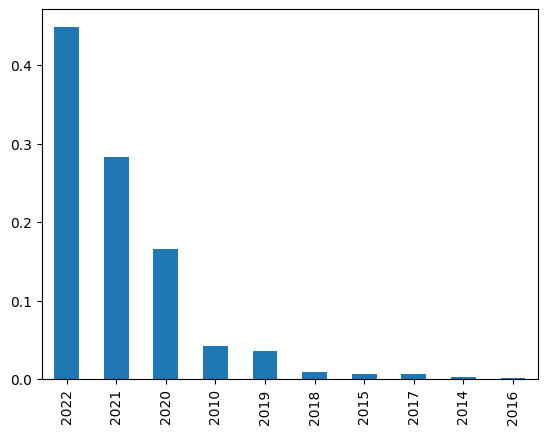

In [45]:
indi['ano_ultimo_resultado'].value_counts(normalize=True).plot.bar()

In [46]:
indi.columns

Index(['cd_indicador', 'nm_indicador', 'dc_formula_indicador',
       'dc_conceito_indicador', 'dc_interpretacao_indicador',
       'dc_nota_tecnica', 'in_visibilidade', 'cd_tipo_situacao',
       'dt_atualizacao', 'cd_operador', 'cd_tipo_unidade_medida', 'cd_fonte',
       'nm_completo_indicador', 'dc_periodicidade_indicador',
       'dc_unidade_territorial', 'dc_serie_historica', 'dc_tag_indicador',
       'dc_observacao_indicador', 'tx_fonte_indicador',
       'in_consideracao_regiao', 'periodicidade_padrao',
       'final_serie_historica_padrao', 'ano_atualizacao',
       'ano_ultimo_resultado'],
      dtype='object')

In [47]:
cols_final = ['nm_indicador', 
              'dt_atualizacao', 
              'tx_fonte_indicador',
              'dc_periodicidade_indicador', 
              'dc_serie_historica', 
              'periodicidade_padrao', 
              'final_serie_historica_padrao', 
              'ano_atualizacao', 
              'ano_ultimo_resultado'
             ]

In [48]:
indi = indi[cols_final].copy()

In [49]:
indi.head()

,nm_indicador,dt_atualizacao,tx_fonte_indicador,dc_periodicidade_indicador,dc_serie_historica,periodicidade_padrao,final_serie_historica_padrao,ano_atualizacao,ano_ultimo_resultado
0,Jovens encaminhados por serviços públicos de i...,2023-10-31 15:33:37.272957,Secretaria Municipal de Desenvolvimento Econôm...,Anual,Início: 2013 - Término: 2014,1.0,2014.0,2013.0,2014
1,04.02.04 Alunos por turma da pré-escola da red...,2023-11-01 10:01:29.968742,Secretaria Municipal da Educação (SME),Anual,Inicio: 2006 - atualmente,1.0,2023.0,2022.0,2022
2,Diferença de horas semanais de trabalho domést...,2022-12-28 16:45:45.681903,Pesquisa Nacional por Amostra de Domicílios (P...,Anual.,Início: 2016 - Atualmente.,1.0,2023.0,2022.0,2022
3,Número de servidores municipais ativos,2022-11-25 09:32:20.967282,Secretaria Municipal de Gestão (SEGES),anual,início: 2008 - atualmente,1.0,2023.0,2022.0,2022
4,17.17.04 Número de Contratos com o Terceiro Setor,2022-11-25 09:32:03.342098,Secretaria Municipal de Gestão (SEGES),Anual,Início: 2018 - Atualmente,1.0,2023.0,2022.0,2021


In [50]:
indi.rename({'periodicidade_padrao' : 'delay_anos'}, axis=1, inplace=True)

In [51]:
indi.head()

,nm_indicador,dt_atualizacao,tx_fonte_indicador,dc_periodicidade_indicador,dc_serie_historica,delay_anos,final_serie_historica_padrao,ano_atualizacao,ano_ultimo_resultado
0,Jovens encaminhados por serviços públicos de i...,2023-10-31 15:33:37.272957,Secretaria Municipal de Desenvolvimento Econôm...,Anual,Início: 2013 - Término: 2014,1.0,2014.0,2013.0,2014
1,04.02.04 Alunos por turma da pré-escola da red...,2023-11-01 10:01:29.968742,Secretaria Municipal da Educação (SME),Anual,Inicio: 2006 - atualmente,1.0,2023.0,2022.0,2022
2,Diferença de horas semanais de trabalho domést...,2022-12-28 16:45:45.681903,Pesquisa Nacional por Amostra de Domicílios (P...,Anual.,Início: 2016 - Atualmente.,1.0,2023.0,2022.0,2022
3,Número de servidores municipais ativos,2022-11-25 09:32:20.967282,Secretaria Municipal de Gestão (SEGES),anual,início: 2008 - atualmente,1.0,2023.0,2022.0,2022
4,17.17.04 Número de Contratos com o Terceiro Setor,2022-11-25 09:32:03.342098,Secretaria Municipal de Gestão (SEGES),Anual,Início: 2018 - Atualmente,1.0,2023.0,2022.0,2021


In [52]:
indi['atualizado'] = indi['ano_ultimo_resultado'] >= indi['ano_atualizacao']

In [53]:
indi['atualizado'].mean()

0.5469208211143695

In [54]:
desatualizados = indi[~indi['atualizado']].reset_index(drop=True)

In [55]:
desatualizados

,nm_indicador,dt_atualizacao,tx_fonte_indicador,dc_periodicidade_indicador,dc_serie_historica,delay_anos,final_serie_historica_padrao,ano_atualizacao,ano_ultimo_resultado,atualizado
0,17.17.04 Número de Contratos com o Terceiro Setor,2022-11-25 09:32:03.342098,Secretaria Municipal de Gestão (SEGES),Anual,Início: 2018 - Atualmente,1.0,2023.0,2022.0,2021,False
1,01.03.01 Quantidade de famílias que recebem re...,2022-01-11 13:21:39.221666,Secretaria Municipal de Assistência e Desenvol...,Anual,Início: 2013 - atualmente,1.0,2023.0,2022.0,2021,False
2,Cobertura da vacina Pentavalente (3ª dose) em ...,2022-07-28 17:16:08.513946,API/SI-PNI / SIGA-BI / SINASC; Secretaria Muni...,Anual,Início: 2012 - atualmente,1.0,2023.0,2022.0,2021,False
3,17.17.01 Número de Organizações da Sociedade C...,2022-11-25 09:30:37.732013,Secretaria Municipal de Gestão (SEGES),Anual,Início: 2015 - Atualmente,1.0,2023.0,2022.0,2021,False
4,12.08.02 Pessoas capacitadas por ano pela Univ...,2023-11-13 14:24:39.117502,None,Anual,Início: 2015 - Atualmente,1.0,2023.0,2022.0,2020,False
...,...,...,...,...,...,...,...,...,...,...
304,11.05.01 Áreas inundáveis do município de São ...,2022-03-07 14:31:40.422772,Secretaria Municipal de Infraestrutura Urbana ...,Anual,Início: 2016 - atualmente,1.0,2023.0,2022.0,2021,False
305,04.07.01 Participação em atividades de Educaçã...,2022-02-01 12:07:29.800232,Secretaria do Verde e Meio Ambiente (SVMA),Anual,Início: 2017 - Atualmente,1.0,2023.0,2022.0,2020,False
306,03.03.02 Percentual de pessoas vivendo com HIV...,2022-09-09 11:23:00.959104,Ministério da Saúde (MS); Departamento de Doen...,Anual,Início: 2016 - atualmente,1.0,2023.0,2022.0,2020,False
307,11.07.01 Parques totalmente acessíveis (%),2022-11-03 11:43:01.293455,Secretaria Municipal do Verde e Meio Ambiente ...,Anual,Início: 2018 - Atualmente,1.0,2023.0,2022.0,2020,False


In [56]:
desatualizados['anos_desatualizado'] = desatualizados['ano_atualizacao'] - desatualizados['ano_ultimo_resultado']

<AxesSubplot: title={'center': 'Distribuição do atraso (anos) nos indicadores atrasados'}>

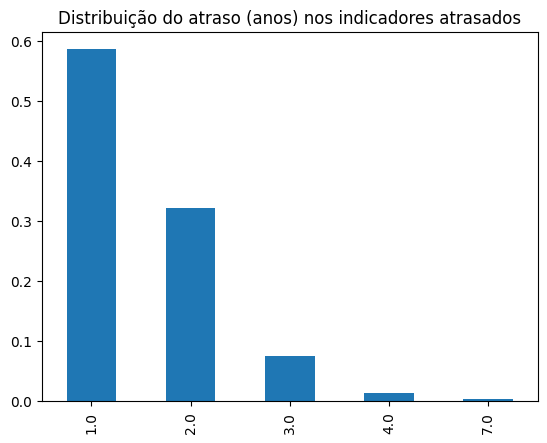

In [57]:
desatualizados['anos_desatualizado'].value_counts(normalize=True).plot.bar(title = 'Distribuição do atraso (anos) nos indicadores atrasados')

In [58]:
desatualizados.to_excel('indicadores_desatualizados_observasampa.xlsx')